# 线性回归  linearRegression.ipynb

In [42]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])

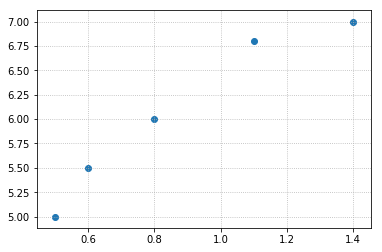

In [43]:
plt.grid(linestyle=':')
plt.scatter(x, y)

   1> w0=1.00000000, w1=1.00000000, loss=44.17500000
   2> w0=5.18000000, w1=4.81200000, loss=30.06185424
   3> w0=1.82544000, w1=1.57579200, loss=20.47602166
   4> w0=4.67330304, w1=4.15240467, loss=13.96408523
   5> w0=2.40588389, w1=1.94517227, loss=9.53935278
   6> w0=4.34824841, w1=3.68446216, loss=6.53196603
   7> w0=2.81767330, w1=2.17693901, loss=4.48714956
   8> w0=4.14429367, w1=3.34897242, loss=3.09613863
   9> w0=3.11290427, w1=2.31750237, loss=2.14929042
  10> w0=4.02059791, w1=3.10547452, loss=1.50425391
  11> w0=3.32718242, w1=2.39810888, loss=1.06436224
  12> w0=3.94966418, w1=2.92626010, loss=0.76396423
  13> w0=3.48489111, w1=2.43974169, loss=0.55846665
  14> w0=3.91302731, w1=2.79230586, loss=0.41757409
  15> w0=3.60277085, w1=2.45644344, loss=0.32069981
  16> w0=3.89832977, w1=2.69050909, loss=0.25384999
  17> w0=3.69235200, w1=2.45756886, loss=0.20750851
  18> w0=3.89733940, w1=2.61180823, loss=0.17520079
  19> w0=3.76160876, w1=2.44931108, loss=0.15251862
  20> w0

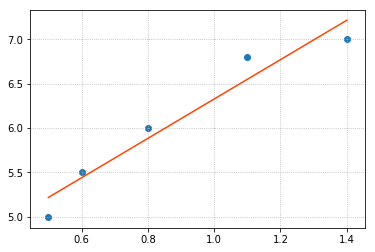

In [44]:
# 目标函数（预测函数） 输入   输出    模型参数    梯度下降    学习率   迭代次数    偏导数   

# 代码实现梯度下降的过程    
w0, w0s = 1, []
w1, w1s = 1, []
losses = []
lrate = 0.2   # 学习率
epoch = 1000   # for循环迭代更新模型参数的轮数
epoches = []
for i in range(epoch):
    # 为了可视化显示模型参数与损失函数的变化，存储相关参数
    epoches.append(i+1)
    w0s.append(w0)
    w1s.append(w1)
    loss = ((w0 + w1*x - y)**2).sum() / 2
    losses.append(loss)
    print('{:4}> w0={:.8f}, w1={:.8f}, loss={:.8f}'.format(
            i+1, w0, w1, loss))
    # 求w0与w1两个方向上的偏导数
    d0 = (w0 + w1*x - y).sum()
    d1 = (x*(w0 + w1*x - y)).sum()
    # 更新w0 与 w1
    w0 = w0 - lrate * d0
    w1 = w1 - lrate * d1
    
# w0就是截距   w1就是斜率   把x带入直线方程，绘制回归线
pred_y = w0 + w1*x 

plt.grid(linestyle=':')
plt.scatter(x, y)
plt.plot(x, pred_y, color='orangered')

## 绘图显示梯度下降的过程

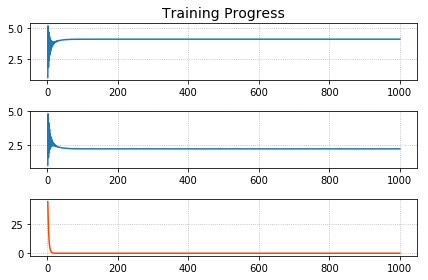

In [45]:
plt.subplot(3,1,1)
plt.title('Training Progress', fontsize=14)
plt.grid(linestyle=':')
plt.plot(epoches, w0s)
plt.tight_layout()  # 重新整理布局，防止文本显示不全
plt.subplot(3,1,2)
plt.grid(linestyle=':')
plt.plot(epoches, w1s)
plt.tight_layout()  
plt.subplot(3,1,3)
plt.grid(linestyle=':')
plt.plot(epoches, losses, color='orangered')
plt.tight_layout()  

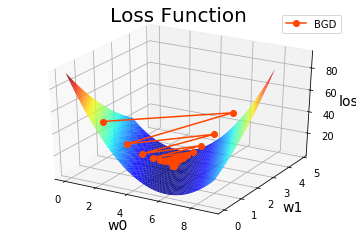

In [46]:
import mpl_toolkits.mplot3d as axes3d

grid_w0, grid_w1 = np.meshgrid(
    np.linspace(0, 9, 500),
    np.linspace(0, 3.5, 500))

grid_loss = np.zeros_like(grid_w0)
for px, py in zip(x, y):
    grid_loss += ((grid_w0 + px*grid_w1 - py) ** 2) / 2

plt.figure('Loss Function')
ax = plt.gca(projection='3d')
plt.title('Loss Function', fontsize=20)
ax.set_xlabel('w0', fontsize=14)
ax.set_ylabel('w1', fontsize=14)
ax.set_zlabel('loss', fontsize=14)
ax.plot_surface(grid_w0, grid_w1, grid_loss, rstride=10, cstride=10, cmap='jet')
ax.plot(w0s, w1s, losses, 'o-', c='orangered', label='BGD')
plt.legend()

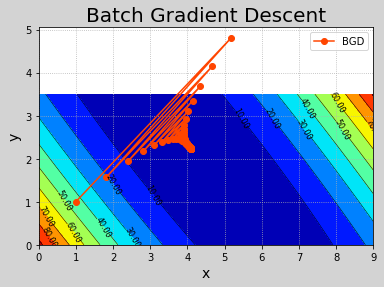

In [49]:
plt.figure('Batch Gradient Descent', facecolor='lightgray')
plt.title('Batch Gradient Descent', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.tick_params(labelsize=10)
plt.grid(linestyle=':')
plt.contourf(grid_w0, grid_w1, grid_loss, 10, cmap='jet')
cntr = plt.contour(grid_w0, grid_w1, grid_loss, 10,
                  colors='black', linewidths=0.5)
plt.clabel(cntr, inline_spacing=0.1, fmt='%.2f',
          fontsize=8)
plt.plot(w0s, w1s, 'o-', c='orangered', label='BGD')
plt.legend()
plt.show()
